<br> Punto 1:





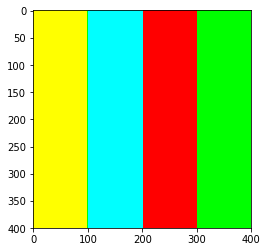

In [3]:
%matplotlib inline 
from skimage import io, color
import numpy as np
import cv2
from PIL import Image, ImageColor
import matplotlib.pyplot as plt
u=Image.new(mode='RGB',size=(400,400),color=('yellow'))
plt.imshow(u)

R=255
G=255
B=0
for i in range(0,400):
    for j in range(100,400):
        if j>100 and j<=200:
            R=0
            G=255
            B=255
        elif j>200 and j<=300:
            R=255
            G=0
            B=0
        elif j>300 and j<=400:
            R=0
            G=255
            B=0
        u.putpixel((j,i), (R,G,B))   
        

plt.imshow(u)

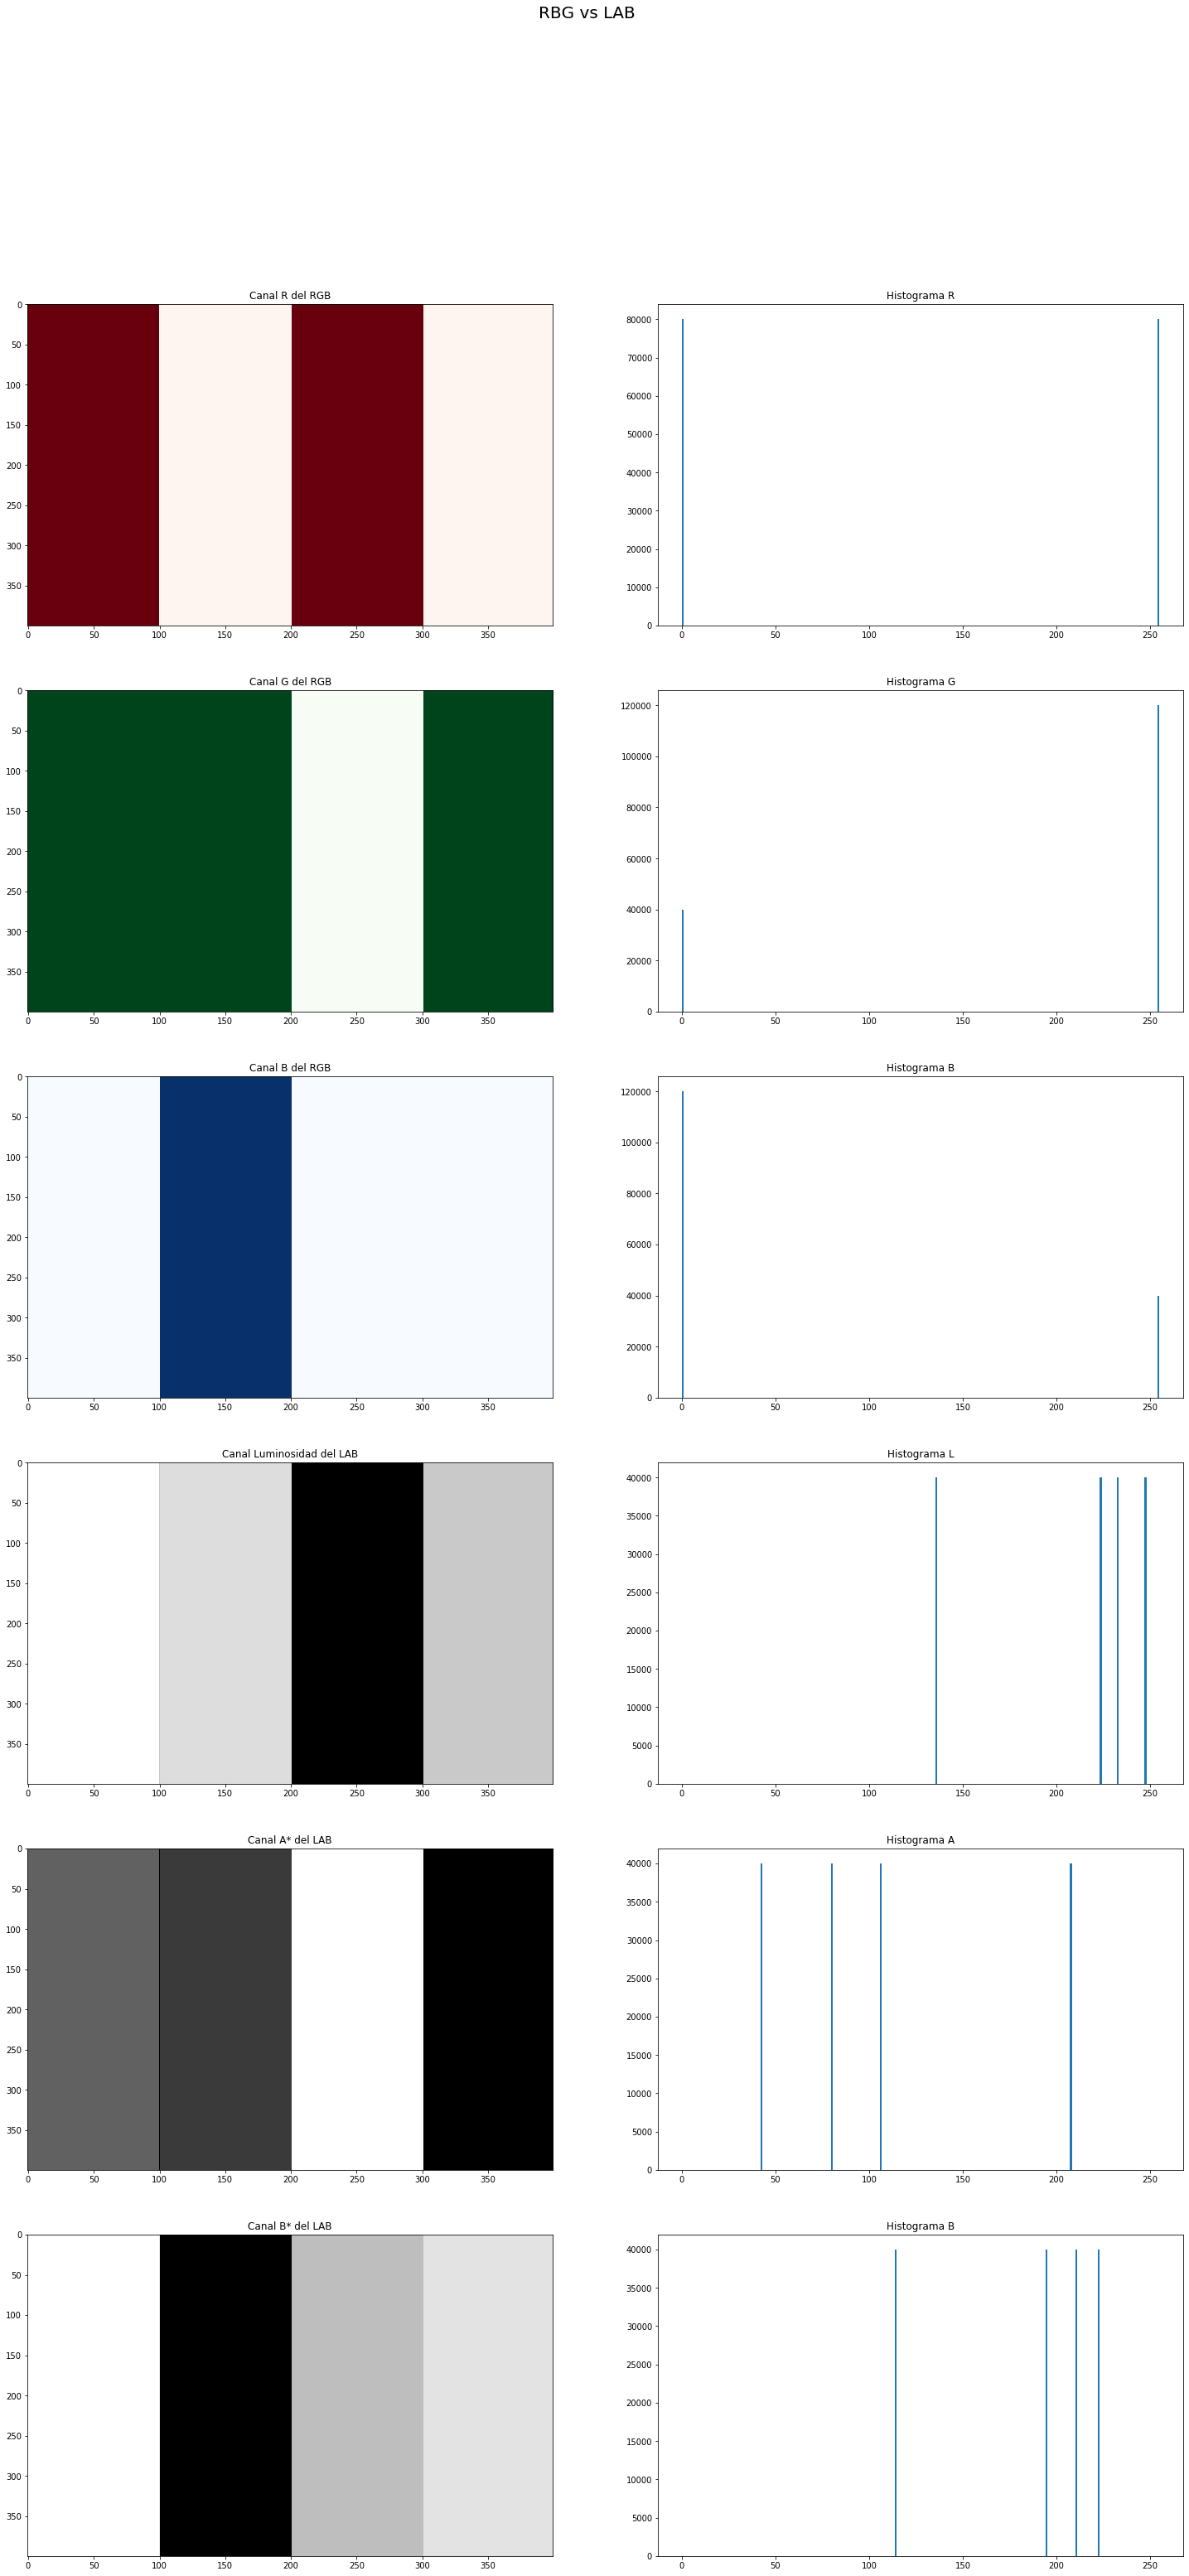

In [9]:
#Lectura de cada canal correspondiente al espacio RGB
uj= np.array(u)
uj= uj[:, :, ::-1].copy()

uj_rgb=cv2.cvtColor(uj, cv2.COLOR_BGR2RGB)
uj_R = uj_rgb[:,:,0]
uj_G = uj_rgb[:,:,1]
uj_B = uj_rgb[:,:,2]
#Lectura de cada canal correspondiente al espacio LAB
uj_lab = cv2.cvtColor(uj, cv2.COLOR_BGR2LAB)

uj_L = uj_lab[:,:,0]
uj_A =  uj_lab[:,:,1]
ujlab_B = uj_lab[:,:,2]
#Mostrar y comparar imágenes
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12)) = plt.subplots(6,2, figsize=(25,50))
fig.suptitle('RBG vs LAB', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(uj_R, cmap='Reds', aspect='auto')
ax2.set_title('Histograma R')
ax2.hist(uj_R.ravel(), bins=256, range=(0.0, 255.0))
ax3.set_title('Canal G del RGB')
ax3.imshow(uj_G, cmap='Greens', aspect='auto')
ax4.set_title('Histograma G')
ax4.hist(uj_G.ravel(), bins=256, range=(0.0, 255.0))
ax5.set_title('Canal B del RGB')
ax5.imshow(uj_B, cmap='Blues', aspect='auto')
ax6.set_title('Histograma B')
ax6.hist(uj_B.ravel(), bins=256, range=(0.0, 255.0))
ax7.set_title('Canal Luminosidad del LAB')
ax7.imshow(uj_L, cmap='gray', aspect='auto')
ax8.set_title('Histograma L')
ax8.hist(uj_L.ravel(), bins=256, range=(0.0, 255.0))
ax9.set_title('Canal A* del LAB')
ax9.imshow(uj_A, cmap='gray', aspect='auto')
ax10.set_title('Histograma A')
ax10.hist(uj_A.ravel(), bins=256, range=(0.0, 255.0))
ax11.set_title('Canal B* del LAB')
ax11.imshow(ujlab_B, cmap='gray', aspect='auto')
ax12.set_title('Histograma B')
_=ax12.hist(ujlab_B.ravel(), bins=256, range=(0.0, 255.0))

<br> Punto 1) C)

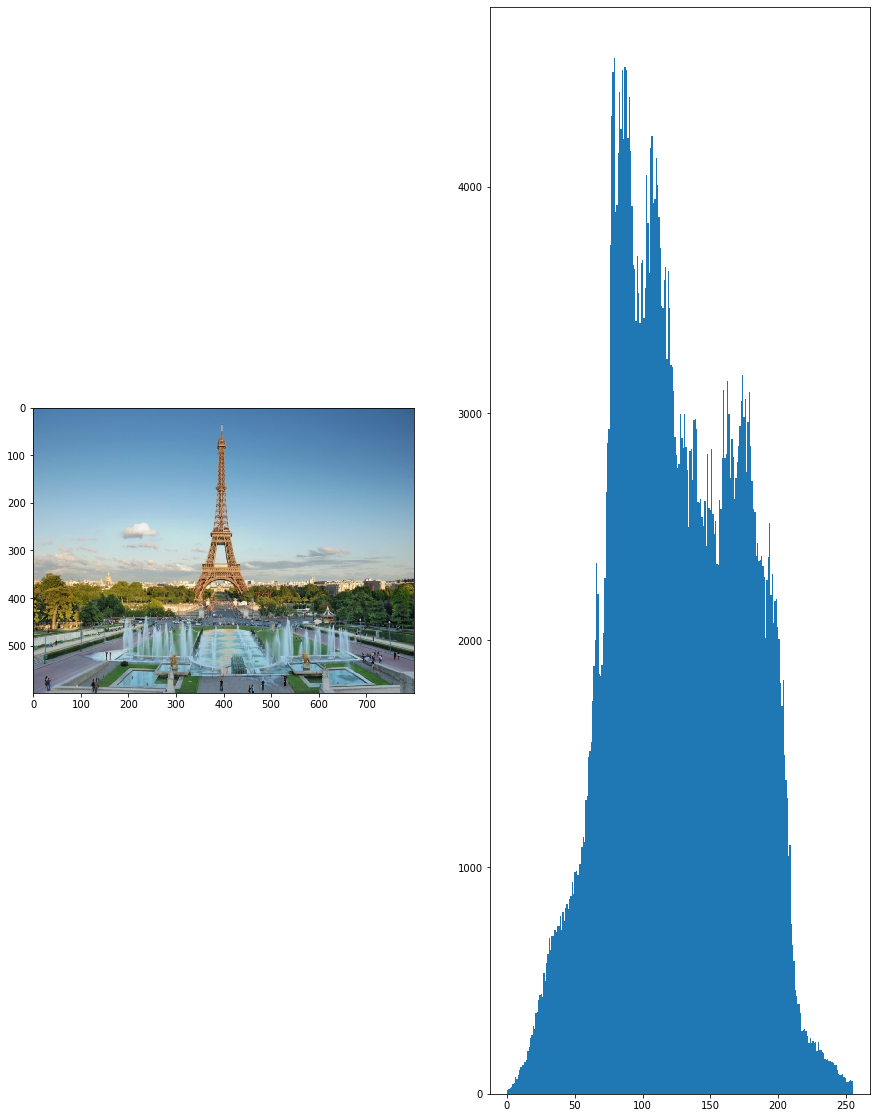

In [78]:
eif = cv2.imread("res/eiffel.jpg", cv2.IMREAD_COLOR)
eif= cv2.resize(eif,(800,600))
eif_rgb  = cv2.cvtColor(eif, cv2.COLOR_BGR2RGB)
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15,20))
ax1.imshow(eif_rgb)
_=ax2.hist(eif_rgb[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

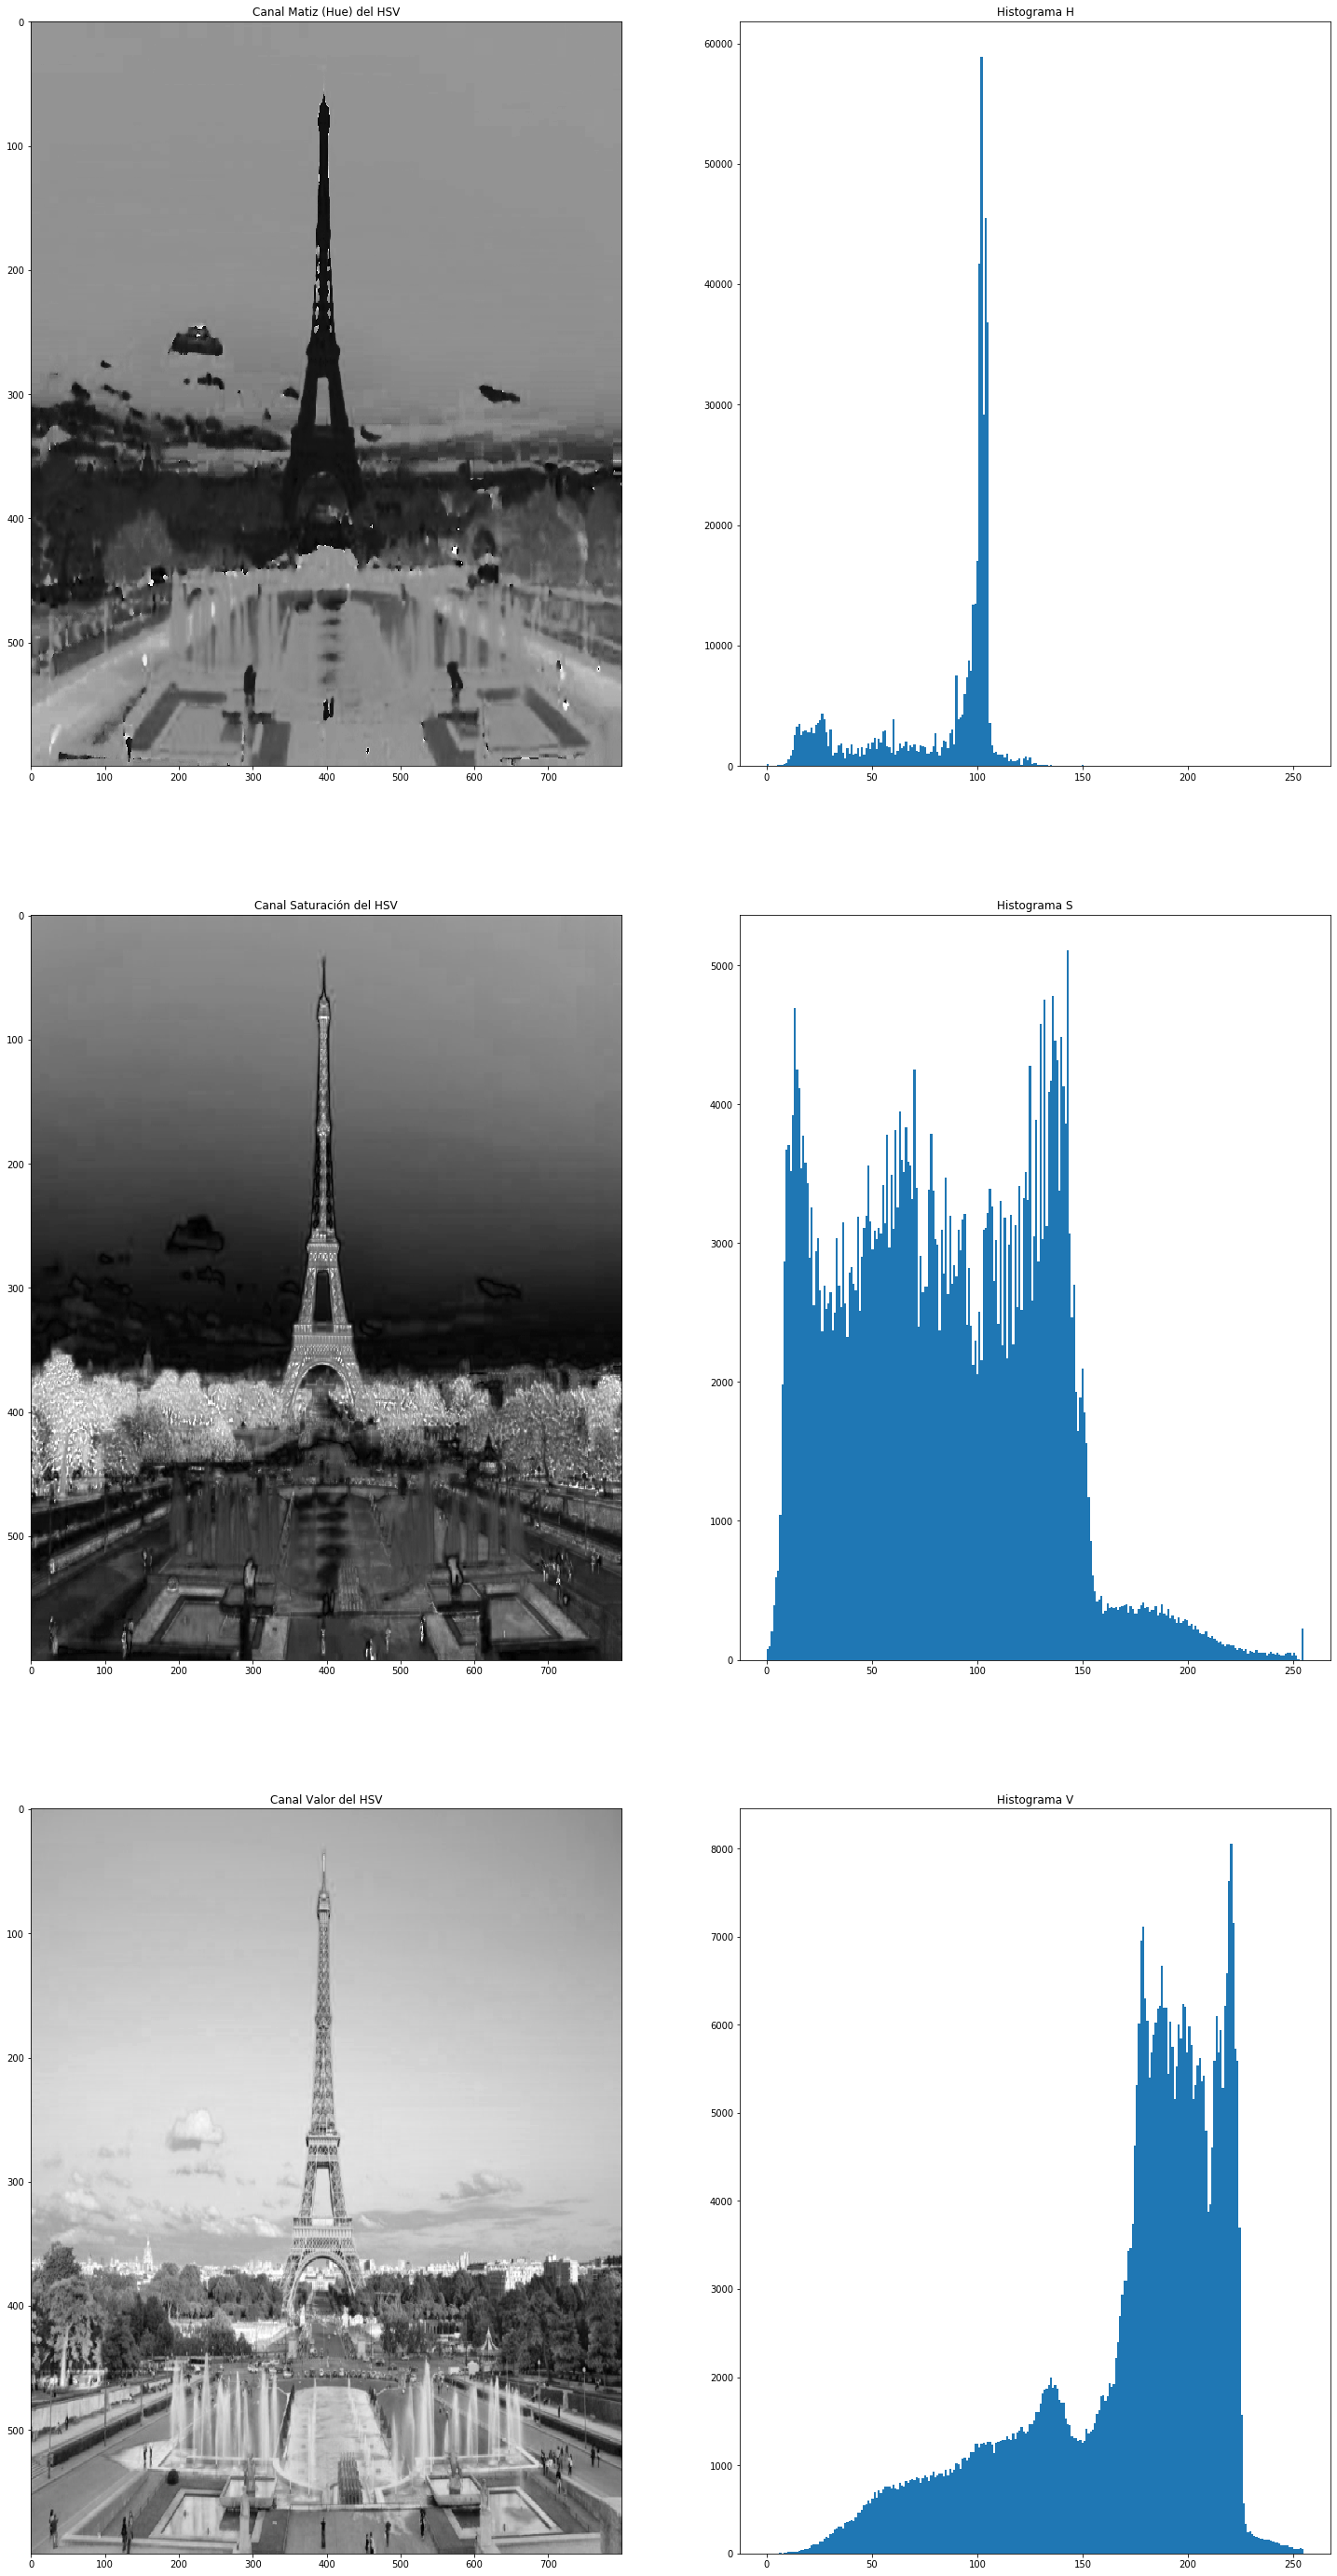

In [75]:
eif_hsv = cv2.cvtColor(eif, cv2.COLOR_BGR2HSV)
eif_H = eif_hsv[:,:,0]
eif_S =  eif_hsv[:,:,1]
eif_V = eif_hsv[:,:,2]

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2, figsize=(25,50))
ax1.set_title('Canal Matiz (Hue) del HSV')
ax1.imshow(eif_H, cmap='gray', aspect='auto')
ax2.set_title('Histograma H')
ax2.hist(eif_H.ravel(), bins=256, range=(0.0, 255.0))
ax3.set_title('Canal Saturación del HSV')
ax3.imshow(eif_S, cmap='gray', aspect='auto')
ax4.set_title('Histograma S')
ax4.hist(eif_S.ravel(), bins=256, range=(0.0, 255.0))
ax5.set_title('Canal Valor del HSV')
ax5.imshow(eif_V, cmap='gray', aspect='auto')
ax6.set_title('Histograma V')
_=ax6.hist(eif_V.ravel(), bins=256, range=(0.0, 255.0))

<br> Se aplicaron las siguientes transformaciones: </br>

# <center> $ G(x,y) = (1-k)*I1(x,y) + k*I2(x,y) $ </center>

# <center> $ 0 < k < 1 $ </center>

### Punto 2

#### 2.1 Montaje y objetos

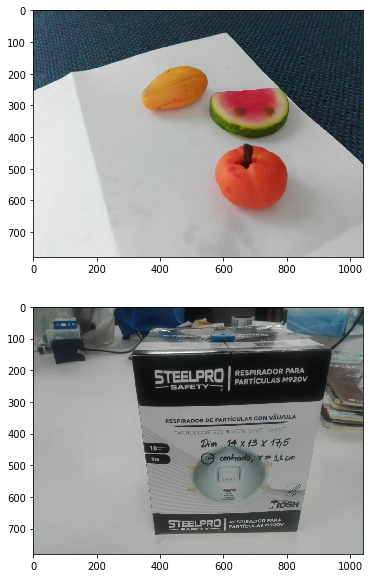

In [17]:
fig, arreglo_plots = plt.subplots(2,1, figsize=(20,10))
colors = ('r','g','b')

#Frutas de mazapán en condiciones no
fru = cv2.imread("res/Frutas.png", cv2.IMREAD_COLOR )
fru = cv2.cvtColor(fru, cv2.COLOR_BGR2RGB)
arreglo_plots[0].imshow(fru)

mon = cv2.imread("res/Montaje.png", cv2.IMREAD_COLOR )
mon = cv2.cvtColor(mon, cv2.COLOR_BGR2RGB)
arreglo_plots[1].imshow(mon)

#### 2.2  Descripción del montaje

El dispositivo de control de iluminación de imagen consta de una caja de cartón flexible, cuyas dimensiones son *14 x 13 x17.5 cm*
En el centro de la parte superior (donde se cruzan las diagonales) se cortó un agujero circular de *2 cm* de radio, medida óptima para posicionar tanto la cámara como el flash de un teléfono celular.

El conjunto de objetos elegido consiste en 6 frutas de mazapán de tamaño pequeño, agrupadas de tres maneras diferentes. 
Las dimensiones de las frutas son las siquientes: 

* Papaya: 3.5 x 1 x 2cm
* Durazno: r = 1cm
* Calabaza: r = 2.5cm
* Banano: 4.5 x 1.5 x 1cm
* Pera: r = 1cm
* Sandía: 3.5 x 2.5 x 0.5 cm

La toma de imágenes se realizó con la cámara de un celular Huawei Y6II L-23, que cuenta con *13 megapíxeles* 
Las imágenes tomadas son de dimensiones 4160x3120

ISO = 360
F = 2.00
S = 1/33s

La distancia promedio entre los objetos posicionados y el lente fue de aproximadamene *1,4 cm, que representan **2/25* de la altura del dispositivo.

#### 2.3 Imágenes obtenidas

Se tomaron 6 fotografías con las distintas distribuciones y agrupaciones de los objetos con base en su color predominante (por ejemplo, frutas amarillas). 

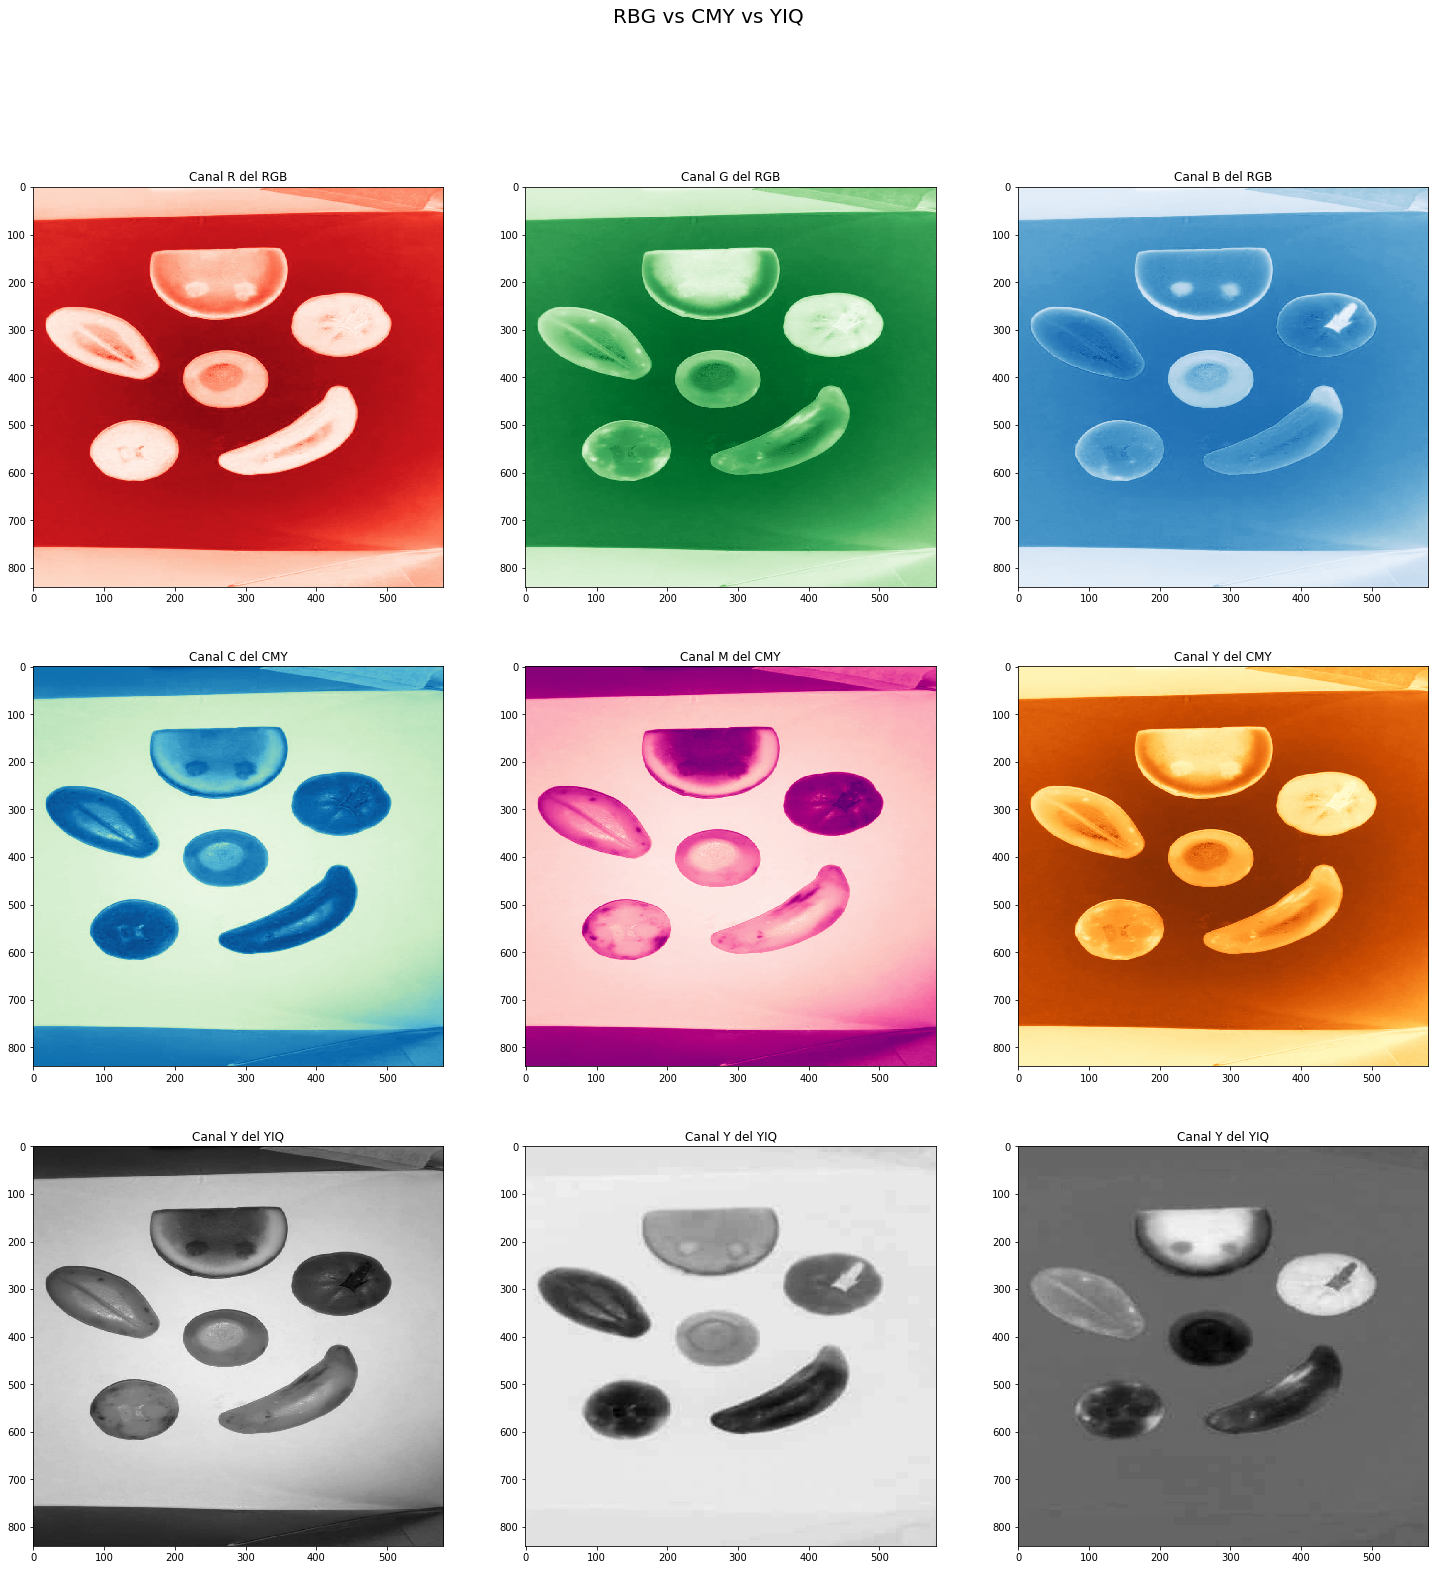

In [27]:
#Todas las frutas

frutas = cv2.imread("res\Frutas1.png", cv2.IMREAD_COLOR)
frutas_rgb  = cv2.cvtColor(Frutas, cv2.COLOR_BGR2RGB)
frutas_rgb = frutas_rgb[100:-100,100:-100]

##
#Espacio RGB
frutas_R = frutas_rgb[:,:,0]
frutas_G = frutas_rgb[:,:,1]
frutas_B = frutas_rgb[:,:,2]

#Espacio CMY 
frutas_C = 255 - frutas_rgb[:,:,0]
frutas_M = 255 - frutas_rgb[:,:,1]
frutas_Y = 255 - frutas_rgb[:,:,2]

#Espacio YIQ
frutas_Y = 0.299*frutas_R + 0.587*frutas_G + 0.114*frutas_B
frutas_I2 = 0.596*frutas_R - 0.274*frutas_G - 0.322*frutas_B
frutas_Q = 0.211*frutas_R - 0.523*frutas_G + 0.312*frutas_B

#Comparación de los canales
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(25, 25))
fig.suptitle('RBG vs CMY vs YIQ', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(frutas_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(frutas_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(frutas_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal C del CMY')
ax4.imshow(frutas_C, cmap='GnBu', aspect='auto')
ax5.set_title('Canal M del CMY')
ax5.imshow(frutas_M, cmap='RdPu', aspect='auto')
ax6.set_title('Canal Y del CMY')
ax6.imshow(frutas_Y, cmap='YlOrBr', aspect='auto')
ax7.set_title('Canal Y del YIQ')
ax7.imshow(frutas_Y,cmap='gray',aspect='auto')
ax8.set_title('Canal Y del YIQ')
ax8.imshow(frutas_I2,cmap='gray',aspect='auto')
ax9.set_title('Canal Y del YIQ')
ax9.imshow(frutas_Q,cmap='gray',aspect='auto')

In [19]:
print(Frutas)

None


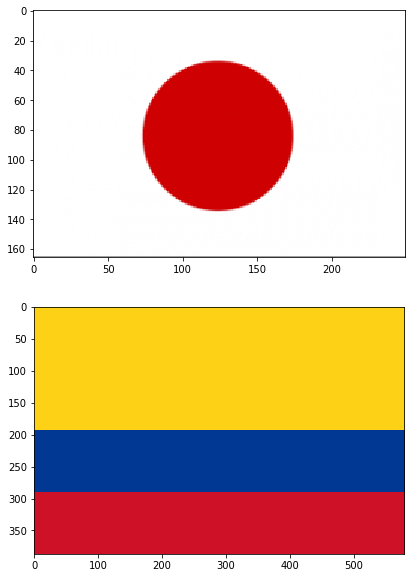

In [11]:
fig, arreglo_plots = plt.subplots(2,1, figsize=(20,10))
colors = ('r','g','b')

img = cv2.imread("res/jap.png", cv2.IMREAD_COLOR )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
arreglo_plots[0].imshow(img)

img2 = cv2.imread("res/col.png", cv2.IMREAD_COLOR )
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
arreglo_plots[1].imshow(img2)


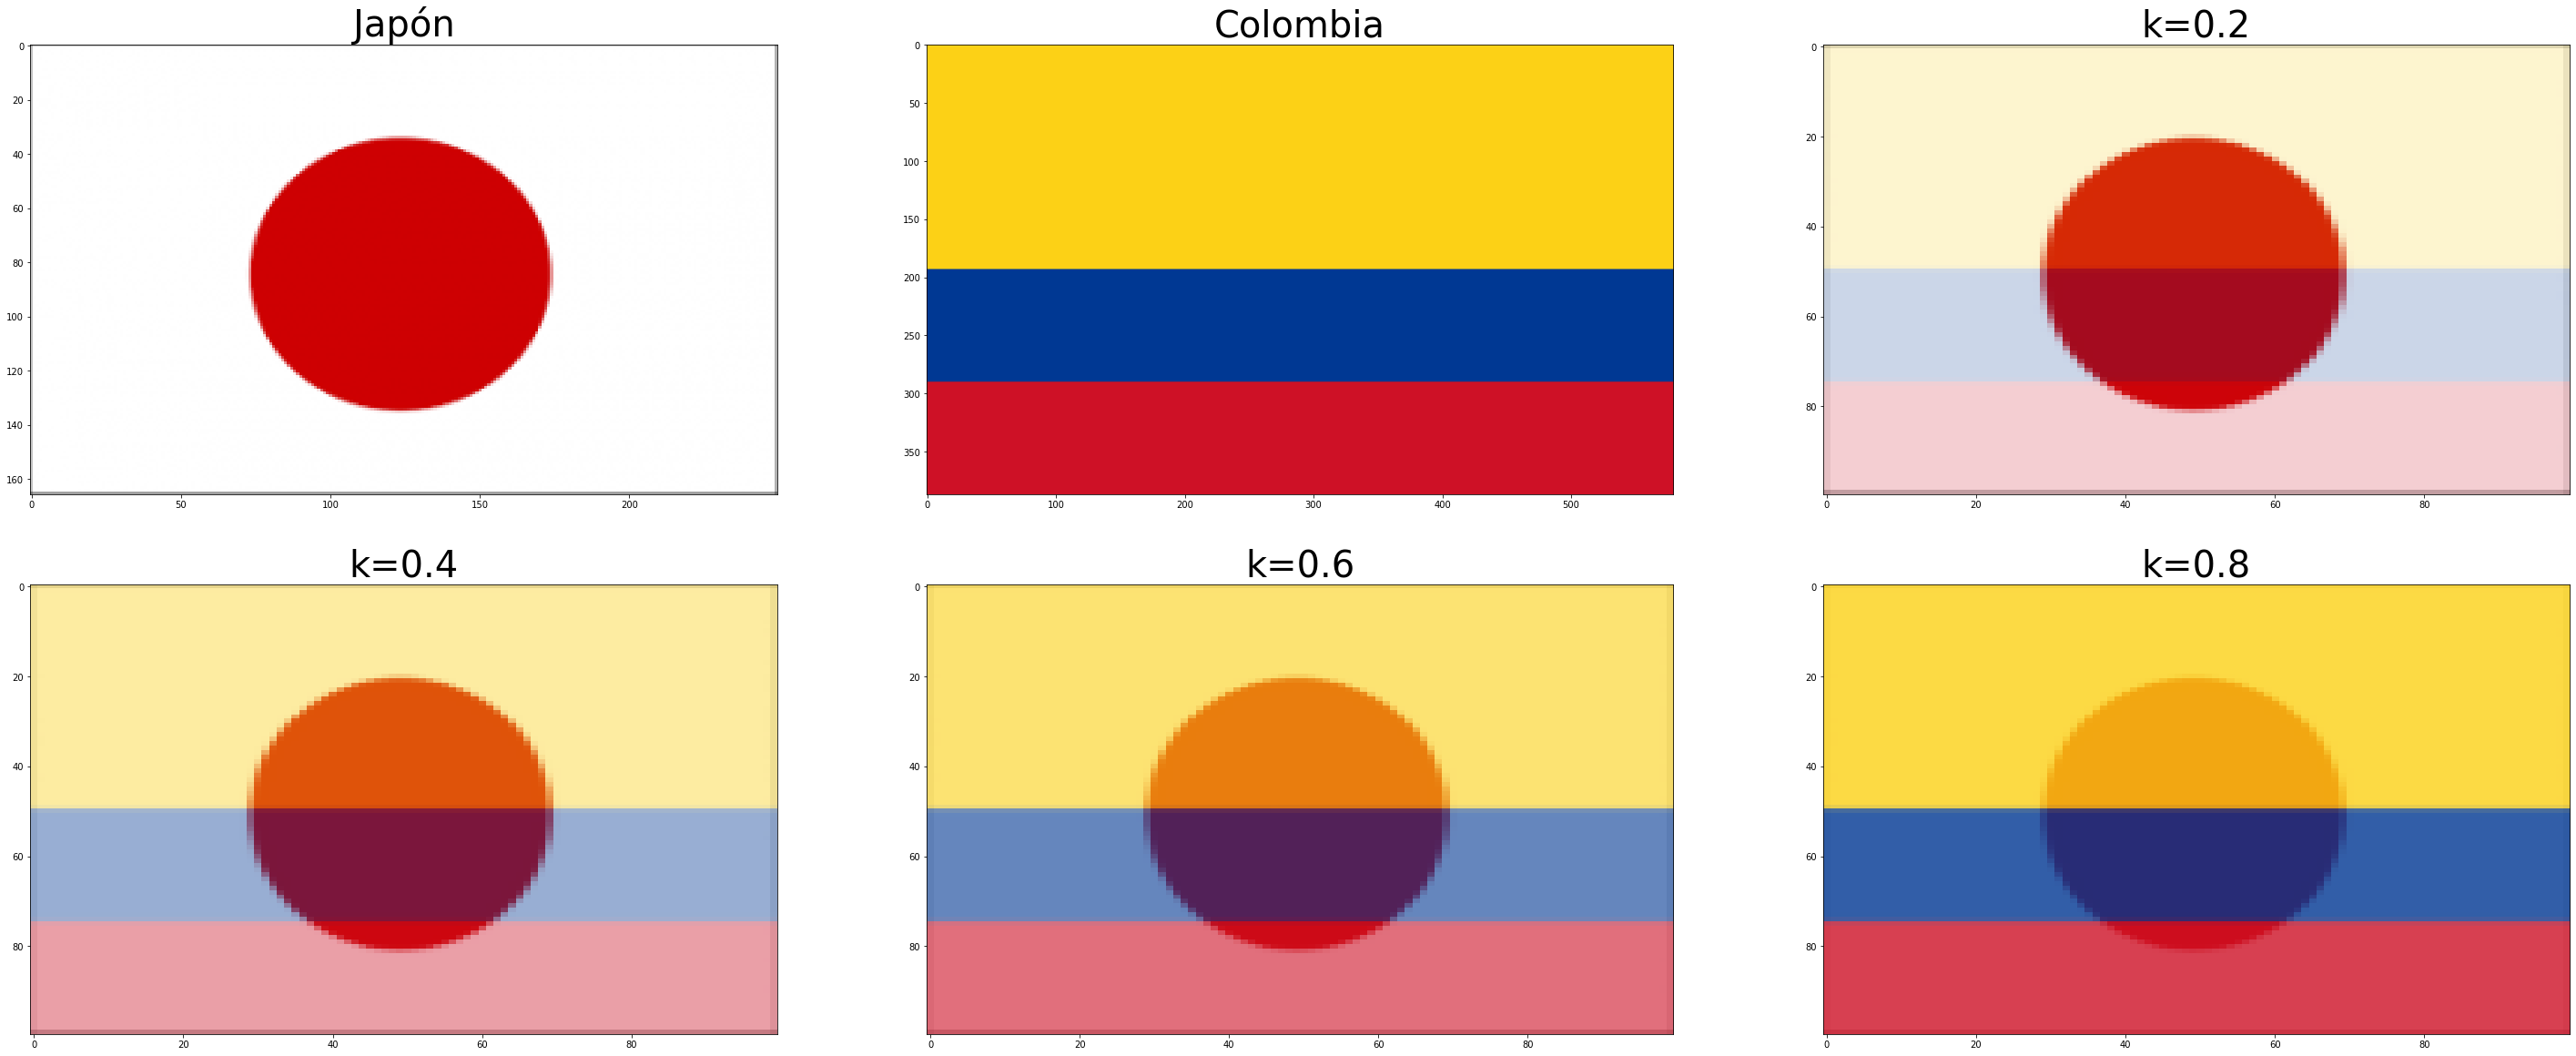

In [52]:
from skimage.transform import resize

def F(img,img2,k):
    img=resize(img,(100,100))
    img2=resize(img2,(100,100))
    return (1-k)*img + k*img2
G= F(img,img2,0.4)
G1=F(img,img2,0.2)
G2=F(img,img2,0.6)
G3=F(img,img2,0.8)

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(50, 20))
ax1.set_title('Japón',fontsize=40)
ax1.imshow(img, aspect='auto')
ax2.set_title('Colombia',fontsize=40)
ax2.imshow(img2,  aspect='auto')
ax3.set_title('k=0.2',fontsize=40)
ax3.imshow(G1, aspect='auto')
ax4.set_title('k=0.4',fontsize=40)
ax4.imshow(G, aspect='auto')
ax5.set_title('k=0.6',fontsize=40)
ax5.imshow(G2, aspect='auto')
ax6.set_title('k=0.8',fontsize=40)
ax6.imshow(G3, aspect='auto')



# <center> $ G(x,y) = a*I1(x,y) + b $ </center>

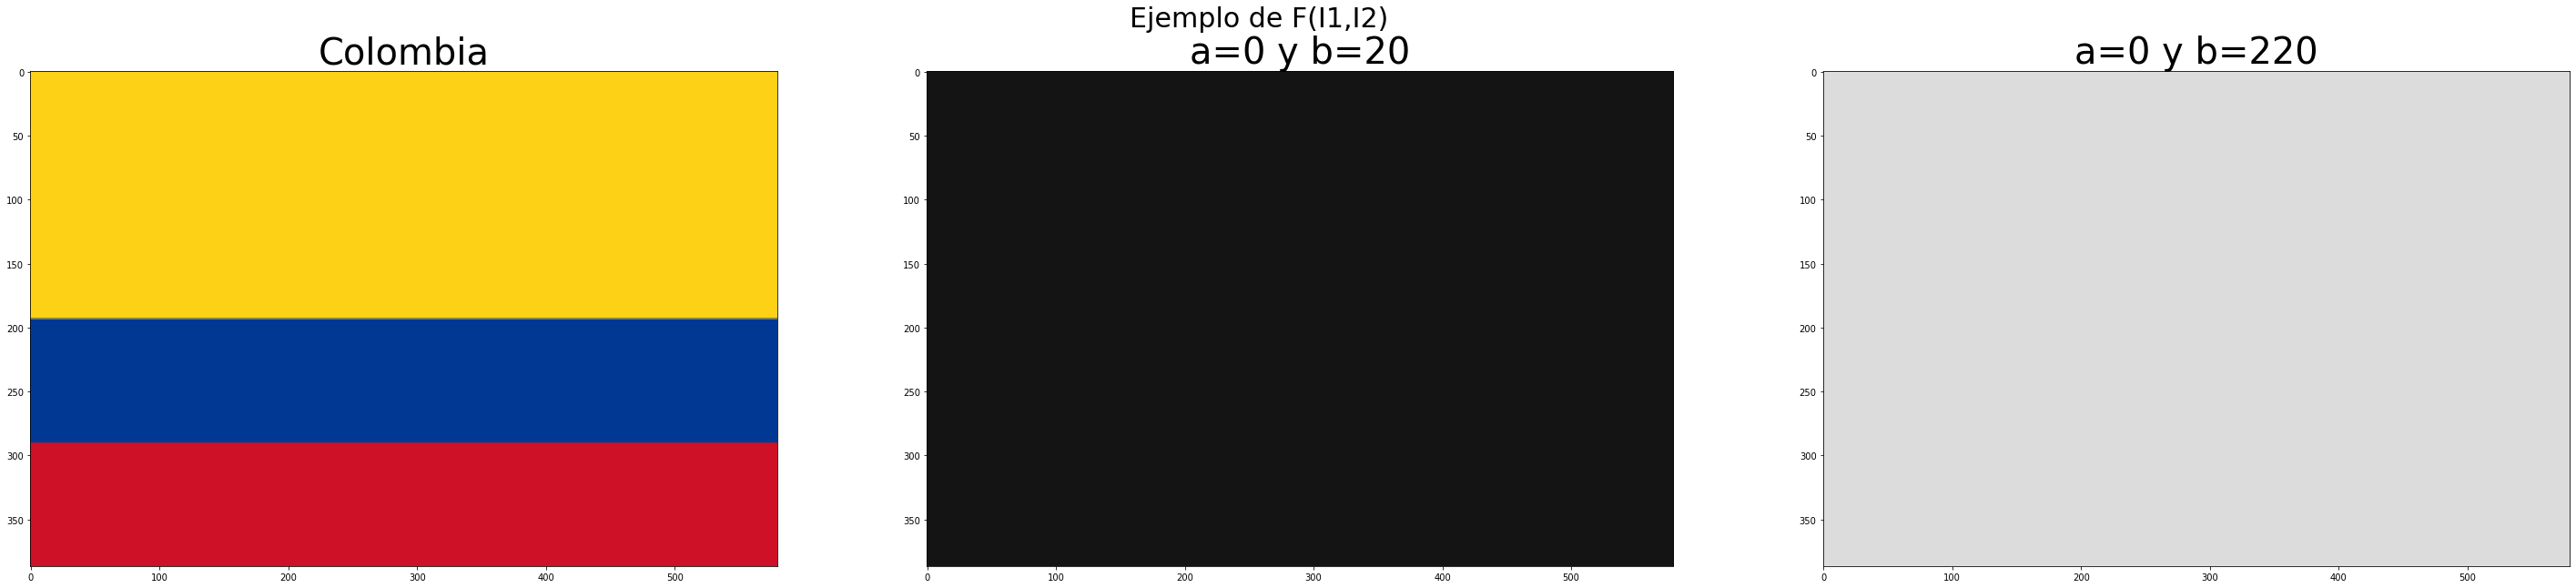

In [50]:
def H(img2,a,b):
    return a*img2 + b
G= H(img2,0,20)
G1=H(img2,0,220)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(50, 10))
fig.suptitle('Ejemplo de F(I1,I2)', fontsize=30)
ax1.set_title('Colombia',fontsize=40)
ax1.imshow(img2,  aspect='auto')
ax2.set_title('a=0 y b=20',fontsize=40)
ax2.imshow(G, aspect='auto')
ax3.set_title('a=0 y b=220',fontsize=40)
ax3.imshow(G1, aspect='auto')

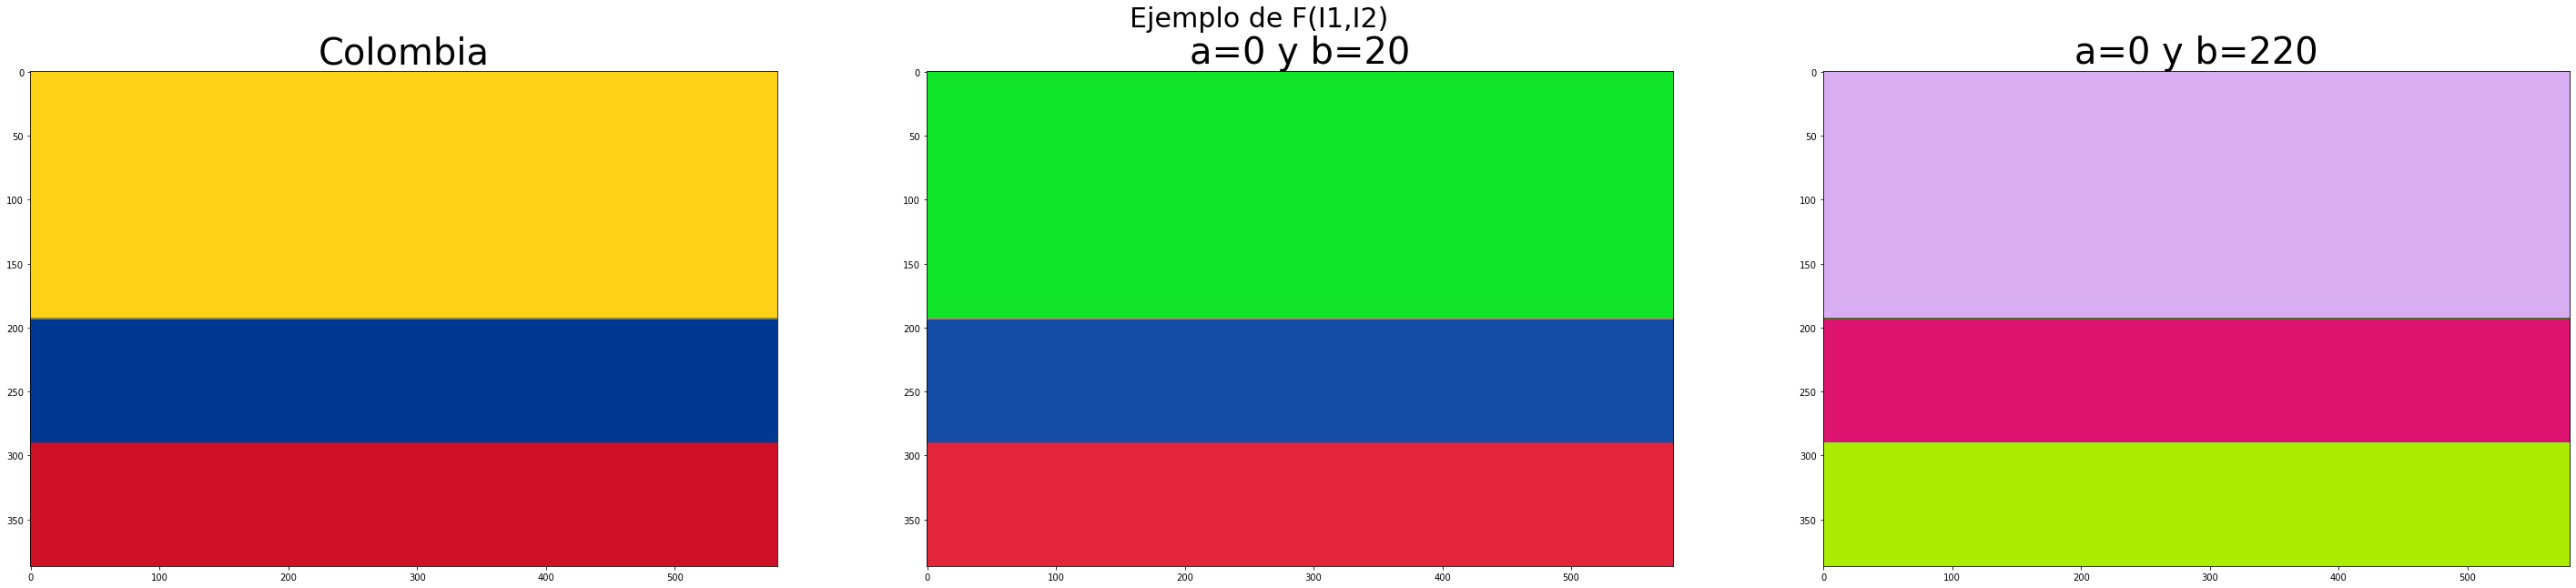

In [51]:

G= H(img2,1,20)
G1=H(img2,1,220)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(50, 10))
fig.suptitle('Ejemplo de F(I1,I2)', fontsize=30)
ax1.set_title('Colombia',fontsize=40)
ax1.imshow(img2,  aspect='auto')
ax2.set_title('a=0 y b=20',fontsize=40)
ax2.imshow(G, aspect='auto')
ax3.set_title('a=0 y b=220',fontsize=40)
ax3.imshow(G1, aspect='auto')

<br> Punto de bordes:

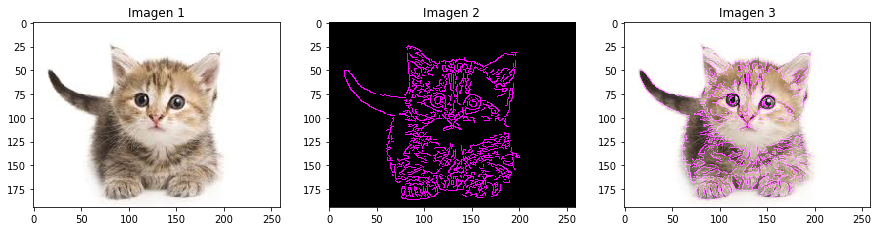

In [34]:
#Leer la imagen de entrada
img1=cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)

#Utilizamos la función cv2.Canny, que corresponde a un algoritmo de detección de bordes
edges = cv2.Canny(img1,100,200)
#Resaltar los bordes de blanco si sus pixeles son menores que un valor umbral
edges[edges<128] = 0   
#Convertir la imagen edges a RGB
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

edges[:,:,1]=0               #para obtener el color magenta (255,0,255)

#Crear una figura 1x3 para mostrar la imagen de entrada, la imagen obtenida con edges y la superposición
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(cv2.add(img1,edges),cmap='gray')
plt.title("Imagen 3");
